In [106]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('data/Churn_Modelling.csv')

In [4]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
from metrics import data_info
data_info(dataset)

,Columns,n_uniques,unique,dtypes,NULLS
0,RowNumber,10000,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",int64,0
1,CustomerId,10000,"[15634602, 15647311, 15619304, 15701354, 15737...",int64,0
2,Surname,2932,"[Hargrave, Hill, Onio, Boni, Mitchell, Chu, Ba...",object,0
3,CreditScore,460,"[619, 608, 502, 699, 850, 645, 822, 376, 501, ...",int64,0
4,Geography,3,"[France, Spain, Germany]",object,0
5,Gender,2,"[Female, Male]",object,0
6,Age,70,"[42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 2...",int64,0
7,Tenure,11,"[2, 1, 8, 7, 4, 6, 3, 10, 5, 9, 0]",int64,0
8,Balance,6382,"[0.0, 83807.86, 159660.8, 125510.82, 113755.78...",float64,0
9,NumOfProducts,4,"[1, 3, 2, 4]",int64,0


In [6]:
dataset.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [7]:
data_info(dataset)

,Columns,n_uniques,unique,dtypes,NULLS
0,CreditScore,460,"[619, 608, 502, 699, 850, 645, 822, 376, 501, ...",int64,0
1,Geography,3,"[France, Spain, Germany]",object,0
2,Gender,2,"[Female, Male]",object,0
3,Age,70,"[42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 2...",int64,0
4,Tenure,11,"[2, 1, 8, 7, 4, 6, 3, 10, 5, 9, 0]",int64,0
5,Balance,6382,"[0.0, 83807.86, 159660.8, 125510.82, 113755.78...",float64,0
6,NumOfProducts,4,"[1, 3, 2, 4]",int64,0
7,HasCrCard,2,"[1, 0]",int64,0
8,IsActiveMember,2,"[1, 0]",int64,0
9,EstimatedSalary,9999,"[101348.88, 112542.58, 113931.57, 93826.63, 79...",float64,0


In [126]:
# dataset = pd.get_dummies(dataset,drop_first=True)

In [127]:
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [128]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.f25)

In [130]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [139]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [158]:
model = Sequential()
model.add(Dense(units=100,activation='relu',input_dim=X_train.shape[1]))
model.add(BatchNormalization())
model.add(Dense(units=70,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [159]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_105 (Dense)           (None, 100)               1100      
                                                                 
 batch_normalization_53 (Bat  (None, 100)              400       
 chNormalization)                                                
                                                                 
 dense_106 (Dense)           (None, 70)                7070      
                                                                 
 batch_normalization_54 (Bat  (None, 70)               280       
 chNormalization)                                                
                                                                 
 dense_107 (Dense)           (None, 30)                2130      
                                                                 
 dense_108 (Dense)           (None, 1)               

In [160]:
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [161]:
history = model.fit(X_train,y_train,epochs=60,batch_size=100,validation_split=0.1)

Epoch 1/60
68/68 [==============================] - 2s 6ms/step - loss: 0.6558 - accuracy: 0.6363 - val_loss: 0.5892 - val_accuracy: 0.7920
Epoch 2/60
68/68 [==============================] - 0s 3ms/step - loss: 0.4790 - accuracy: 0.7902 - val_loss: 0.5128 - val_accuracy: 0.8173
Epoch 3/60
68/68 [==============================] - 0s 3ms/step - loss: 0.4449 - accuracy: 0.8081 - val_loss: 0.4603 - val_accuracy: 0.8213
Epoch 4/60
68/68 [==============================] - 0s 3ms/step - loss: 0.4256 - accuracy: 0.8188 - val_loss: 0.4234 - val_accuracy: 0.8333
Epoch 5/60
68/68 [==============================] - 0s 3ms/step - loss: 0.4139 - accuracy: 0.8231 - val_loss: 0.4018 - val_accuracy: 0.8360
Epoch 6/60
68/68 [==============================] - 0s 3ms/step - loss: 0.4039 - accuracy: 0.8284 - val_loss: 0.3889 - val_accuracy: 0.8387
Epoch 7/60
68/68 [==============================] - 0s 3ms/step - loss: 0.3931 - accuracy: 0.8357 - val_loss: 0.3802 - val_accuracy: 0.8413
Epoch 8/60
68/68 [==

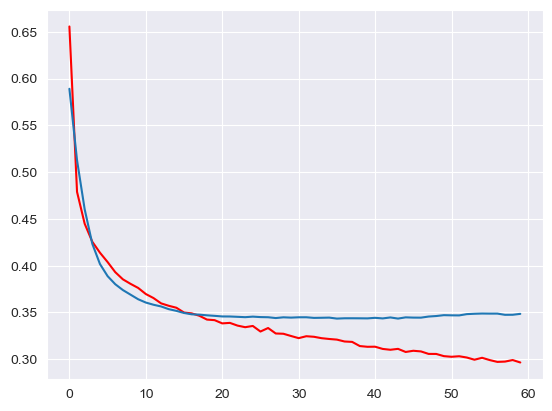

In [162]:
plt.plot(history.history['loss'],label='train',color='red')
plt.plot(history.history['val_loss'],label='val_test')
plt.show()

In [163]:
model.evaluate(X_test, y_test)

79/79 [==============================] - 0s 1ms/step - loss: 0.3522 - accuracy: 0.8548


[0.35221734642982483, 0.8547999858856201]